In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv('/content/dataset-1.csv')
df2 = pd.read_csv('/content/dataset-2.csv')
df3 = pd.read_csv('/content/dataset-3.csv')



*.   df1 = dataset1

*.   df2 = dataset2

*.   df3 = dataset3




* Understand all Dataaset

In [3]:
df1.head()

id_1  id_2  route   moto    car     rv   bus  truck
0   829   827      1   2.05   4.14   4.14  10.1   15.2
1   829   821      4   6.63  13.26  13.26  32.4   48.5
2   829   804      7  14.41  28.92  28.92  64.7   97.0
3   829   822      6   5.90  11.81  11.81  28.8   43.2
4   829   826      9   2.87   5.81   5.81  14.2   21.2

In [36]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id_1    341 non-null    int64  
 1   id_2    341 non-null    int64  
 2   route   341 non-null    int64  
 3   moto    341 non-null    float64
 4   car     341 non-null    float64
 5   rv      341 non-null    float64
 6   bus     341 non-null    float64
 7   truck   341 non-null    float64
dtypes: float64(5), int64(3)
memory usage: 21.4 KB


In [37]:
df1.describe()

id_1        id_2       route        moto         car          rv  \
count  341.000000  341.000000  341.000000  341.000000  341.000000  341.000000   
mean   815.906158  815.920821    5.334311    7.214106   14.411730   14.412229   
std     10.801824   10.817587    2.873760    4.684622    9.382008    9.322661   
min    801.000000  801.000000    1.000000    0.740000    1.390000    1.390000   
25%    805.000000  805.000000    3.000000    3.280000    6.550000    6.550000   
50%    821.000000  821.000000    5.000000    6.450000   12.380000   12.870000   
75%    826.000000  826.000000    8.000000   10.500000   20.920000   20.920000   
max    831.000000  831.000000   10.000000   19.670000   39.240000   39.240000   

              bus       truck  
count  341.000000  341.000000  
mean    31.932845   47.841789  
std     20.532486   30.926161  
min      3.300000    4.350000  
25%     15.100000   22.600000  
50%     28.400000   42.400000  
75%     45.800000   68.700000  
max     86.500000  129.800000

* check Null values

In [38]:
df1.any()

id_1     True
id_2     True
route    True
moto     True
car      True
rv       True
bus      True
truck    True
dtype: bool

In [39]:
#There is no null value
df1.isnull().sum()

id_1     0
id_2     0
route    0
moto     0
car      0
rv       0
bus      0
truck    0
dtype: int64

* check Duplicated Values

In [40]:
#There is No duplicated in table
df1[df1.duplicated()]

Empty DataFrame
Columns: [id_1, id_2, route, moto, car, rv, bus, truck]
Index: []

* check Unique values

In [54]:
def value_counts(l):
  for i in l:
    print(f'Column Name : {i}')
    print("Total Unique Value")
    print(df1[f'{i}'].nunique())
    print('\n')
    print(df1[f'{i}'].unique())
    print('\n')
    print('='*200)



In [55]:
value_counts(list(df1.columns))

Column Name : id_1
Total Unique Value
19


[829 827 821 804 822 826 807 809 801 824 823 831 808 802 805 825 806 830
 803]


Column Name : id_2
Total Unique Value
19


[827 821 804 822 826 807 809 801 824 823 831 808 802 805 825 806 830 803
 829]


Column Name : route
Total Unique Value
10


[ 1  4  7  6  9  2  5  3 10  8]


Column Name : moto
Total Unique Value
155


[ 2.05  6.63 14.41  5.9   2.87  9.81  7.91 18.21  8.77  5.    1.72  8.51
 16.91 12.41  3.69 11.61  1.23 15.21  4.73 12.52  4.    1.07  7.92  6.02
 16.32  2.46  3.09  3.52  6.62 15.02 10.52  1.8   9.72  3.03 13.32  8.01
  0.9   3.41  1.51 11.81  2.53  8.08  2.11 10.51  6.01  3.11  5.21  7.59
  8.81  8.59 11.68  4.8   6.8   3.9  10.21  9.49 15.87  6.1   2.6   2.2
 10.79  3.   15.38  1.    3.28  3.99  2.09 12.39  1.15  7.36  2.69 11.09
  6.59  2.38  5.79  6.87  9.39  7.08  5.18 15.48  2.37  4.35  5.78 14.18
  9.68  8.88  3.85 12.48  8.4   5.61  4.89 11.27  1.5   7.2   2.7   6.19
  1.9  10.78  5.6  10.5   3.71  2.99  9.37  0.8

# Question 1: Car Matrix Generation

Under the function named generate_car_matrix write a logic that takes the dataset-1.csv as a DataFrame. Return a new DataFrame that follows the following rules:

values from id_2 as columns
values from id_1 as index
dataframe should have values from car column
diagonal values should be 0.

In [9]:
pd.crosstab(df1.id_1,df1.id_2,values=df1.car,aggfunc='sum').fillna(0)

id_2    801    802    803    804    805    806    807    808    809    821  \
id_1                                                                         
801    0.00   2.80   6.00   7.70  11.70  13.40  16.90  19.60  21.00  23.52   
802    2.80   0.00   3.40   5.20   9.20  10.90  14.30  17.10  18.50  20.92   
803    6.00   3.40   0.00   2.00   6.00   7.70  11.10  13.90  15.30  17.72   
804    7.70   5.20   2.00   0.00   4.40   6.10   9.50  12.30  13.70  16.12   
805   11.70   9.20   6.00   4.40   0.00   2.00   5.40   8.20   9.60  12.02   
806   13.40  10.90   7.70   6.10   2.00   0.00   3.80   6.60   8.00  10.42   
807   16.90  14.30  11.10   9.50   5.40   3.80   0.00   2.90   4.30   6.82   
808   19.60  17.10  13.90  12.30   8.20   6.60   2.90   0.00   1.70   4.12   
809   21.00  18.50  15.30  13.70   9.60   8.00   4.30   1.70   0.00   2.92   
821   23.52  20.92  17.72  16.12  12.02  10.42   6.82   4.12   2.92   0.00   
822   24.67  22.07  18.87  17.27  13.17  11.57   7.97   5.27   4.07   1.80   
823   26.53  23.93  20.73  19.13  15.03  13.43   9.83   7.13   5.93   3.67   
824   27.92  25.32  22.12  20.52  16.42   7.80  11.22   8.52   7.32   5.06   
825   29.08  26.48  23.28  21.68  17.58  15.98  12.38   9.68   8.48   6.22   
826   30.87  28.27  25.07  23.47  19.37  17.77  14.17  11.47  10.27   8.01   
827   32.53  29.93  26.73  25.13  21.03  19.43  15.83  13.13  11.93   9.43   
829   36.32  33.72  30.52  28.92  24.82  23.22  19.62  16.92  15.72  13.26   
830   38.27  35.67  32.47  30.87  26.77  25.17  21.57  18.87  17.67  15.17   
831   39.24  36.64  33.44  31.84  27.74  26.14  22.54  19.84  18.64  16.15   

id_2    822    823    824    825    826    827    829    830    831  
id_1                                                                 
801   24.67  26.53  27.92  29.08  30.87  32.53  36.32  38.27  39.24  
802   22.07  23.93  25.32  26.48  28.27  29.93  33.72  35.67  36.64  
803   18.87  20.73  22.12  23.28  25.07  26.73  30.52  32.47  33.44  
804   17.27  19.13  20.52  21.68  23.47  25.13  28.92  30.87  31.84  
805   13.17  15.03  16.42  17.58  19.37  21.03  24.82  26.77  27.74  
806   11.57  13.43  14.82  15.98  17.77  19.43  23.22  25.17  26.14  
807    7.97   9.83  11.22  12.38  14.17  15.83  19.62  21.57  22.54  
808    5.27   7.13   8.52   9.68  11.47  13.13  16.92  18.87  19.84  
809    4.07   5.93   7.32   8.48  10.27  11.93  15.72  17.67  18.64  
821    1.80   3.67   5.06   6.22   8.01   9.43  13.26  15.17  16.15  
822    0.00   2.21   3.60   4.76   6.55   8.00  11.81  13.74  14.68  
823    2.21   0.00   1.79   2.94   4.74   6.15  10.00  11.89  12.87  
824    3.60   1.79   0.00   1.71   3.50   4.92   8.77  10.66  11.64  
825    4.76   2.94   1.71   0.00   2.20   3.65   7.46   9.35  10.33  
826    6.55   4.74   3.50   2.20   0.00   2.05   5.81   7.71   8.69  
827    8.00   6.15   4.92   3.65   2.05   0.00   4.14   6.06   7.04  
829   11.81  10.00  21.40   7.46   5.81   4.14   0.00   2.38   3.36  
830   13.74  11.89  10.66   0.00   7.71   6.06   2.38   0.00   1.39  
831   14.68  12.87  11.64  10.33   8.69   7.04   3.36   1.39   0.00

# Question 2: Car Type Count Calculation

Create a Python function named get_type_count that takes the dataset-1.csv as a DataFrame. Add a new categorical column car_type based on values of the column car:

low for values less than or equal to 15,
medium for values greater than 15 and less than or equal to 25,
high for values greater than 25.
Calculate the count of occurrences for each car_type category and return the result as a dictionary. Sort the dictionary alphabetically based on keys.

In [ ]:
def get_type_count(x):
  if x >= 25:
    return 'high'
  elif x > 15 and x < 25:
    return 'medium'
  else:
    return 'low'

In [ ]:
df1['car_type'] = df1['car'].apply(get_type_count)
df1

id_1  id_2  route   moto    car     rv   bus  truck car_type
0     829   827      1   2.05   4.14   4.14  10.1   15.2      low
1     829   821      4   6.63  13.26  13.26  32.4   48.5      low
2     829   804      7  14.41  28.92  28.92  64.7   97.0     high
3     829   822      6   5.90  11.81  11.81  28.8   43.2      low
4     829   826      9   2.87   5.81   5.81  14.2   21.2      low
..    ...   ...    ...    ...    ...    ...   ...    ...      ...
336   803   802      3   1.70   3.40   3.40   6.9   10.3      low
337   803   805      4   3.00   6.00   6.00  12.0   17.9      low
338   803   825      3  11.59  23.28  23.28  50.1   75.2   medium
339   803   806      9   3.80   7.70   7.70  15.3   23.0      low
340   803   830      1  16.18  32.47  32.47  72.6  108.8     high

[341 rows x 9 columns]

In [ ]:
df1.car_type.value_counts()

low       196
medium     89
high       56
Name: car_type, dtype: int64

In [ ]:
counts = df1.car_type.value_counts().reset_index().rename(columns={'index':'type_car','car_type':'Total'})
counts

type_car  Total
0      low    196
1   medium     89
2     high     56

<Axes: xlabel='type_car', ylabel='Total'>

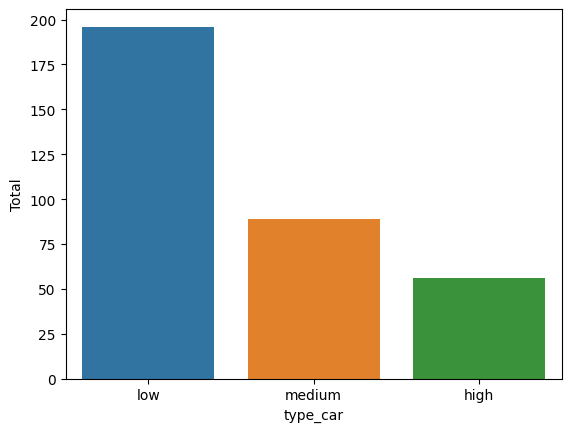

In [ ]:
sns.barplot(x = counts.type_car,y = counts.Total)

# Question 3: Bus Count Index Retrieval

Create a Python function named get_bus_indexes that takes the dataset-1.csv as a DataFrame. The function should identify and return the indices as a list (sorted in ascending order) where the bus values are greater than twice the mean value of the bus column in the DataFrame.

In [ ]:
df1.head()

id_1  id_2  route   moto    car     rv   bus  truck car_type
0   829   827      1   2.05   4.14   4.14  10.1   15.2      low
1   829   821      4   6.63  13.26  13.26  32.4   48.5      low
2   829   804      7  14.41  28.92  28.92  64.7   97.0     high
3   829   822      6   5.90  11.81  11.81  28.8   43.2      low
4   829   826      9   2.87   5.81   5.81  14.2   21.2      low

In [11]:
def get_bus_indexes(df1):
    bus_mean = df1['bus'].mean()

    bus_indexes = df1[df1['bus'] > 2 * bus_mean].index.tolist()

    bus_indexes.sort()

    return bus_indexes

In [19]:
indexes = np.array(get_bus_indexes(df1))
print('get_bus_indexes','\n',indexes)

get_bus_indexes 
 [  2   7  12  17  25  30  54  64  70  97 144 145 149 154 160 201 206 210
 215 234 235 245 250 309 314 319 322 323 334 340]


In [21]:
df1.groupby('route')['truck'].mean()

route
1     49.164103
2     41.403125
3     50.075000
4     51.096774
5     43.327778
6     47.952500
7     52.525862
8     46.128571
9     54.531429
10    41.400000
Name: truck, dtype: float64

# Question 4: Route Filtering

Create a python function filter_routes that takes the dataset-1.csv as a DataFrame. The function should return the sorted list of values of column route for which the average of values of truck column is greater than 7

In [25]:
def filter_routes(df1):

    avg_truck_route = df1.groupby('route')['truck'].mean()

    routes = avg_truck_route[avg_truck_route > 7].index.tolist()

    routes.sort()

    return routes

In [24]:
final_routes = filter_routes(df1)
print(final_routes)


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [26]:
def filter_routes():
  l=[]
  for i in range((df1.shape)[0]):
    if df1.car[i] > 7:
      l.append(df1.route[i])
    else:
      pass
  return np.array(sorted(l))

In [ ]:
filter_routes()

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9

# Question 5: Matrix Value Modification

Create a Python function named multiply_matrix that takes the resulting DataFrame from Question 1, as input and modifies each value according to the following logic:

If a value in the DataFrame is greater than 20, multiply those values by 0.75,
If a value is 20 or less, multiply those values by 1.25.
The function should return the modified DataFrame which has values rounded to 1 decimal place.

In [27]:
def multiply_matrix(x):
  if x > 20:
    return round((x*0.75),1)
  else: return round((x*1.25),1)

In [28]:
pd.crosstab(df1.id_1,df1.id_2,values=df1['car'].apply(multiply_matrix),aggfunc='sum').fillna(0)

id_2   801   802   803   804   805   806   807   808   809   821   822   823  \
id_1                                                                           
801    0.0   3.5   7.5   9.6  14.6  16.8  21.1  24.5  15.8  17.6  18.5  19.9   
802    3.5   0.0   4.2   6.5  11.5  13.6  17.9  21.4  23.1  15.7  16.6  17.9   
803    7.5   4.2   0.0   2.5   7.5   9.6  13.9  17.4  19.1  22.1  23.6  15.5   
804    9.6   6.5   2.5   0.0   5.5   7.6  11.9  15.4  17.1  20.2  21.6  23.9   
805   14.6  11.5   7.5   5.5   0.0   2.5   6.8  10.2  12.0  15.0  16.5  18.8   
806   16.8  13.6   9.6   7.6   2.5   0.0   4.8   8.2  10.0  13.0  14.5  16.8   
807   21.1  17.9  13.9  11.9   6.8   4.8   0.0   3.6   5.4   8.5  10.0  12.3   
808   24.5  21.4  17.4  15.4  10.2   8.2   3.6   0.0   2.1   5.2   6.6   8.9   
809   15.8  23.1  19.1  17.1  12.0  10.0   5.4   2.1   0.0   3.6   5.1   7.4   
821   17.6  15.7  22.1  20.2  15.0  13.0   8.5   5.2   3.6   0.0   2.2   4.6   
822   18.5  16.6  23.6  21.6  16.5  14.5  10.0   6.6   5.1   2.2   0.0   2.8   
823   19.9  17.9  15.5  23.9  18.8  16.8  12.3   8.9   7.4   4.6   2.8   0.0   
824   20.9  19.0  16.6  15.4  20.5   9.8  14.0  10.6   9.2   6.3   4.5   2.2   
825   21.8  19.9  17.5  16.3  22.0  20.0  15.5  12.1  10.6   7.8   5.9   3.7   
826   23.2  21.2  18.8  17.6  24.2  22.2  17.7  14.3  12.8  10.0   8.2   5.9   
827   24.4  22.4  20.0  18.8  15.8  24.3  19.8  16.4  14.9  11.8  10.0   7.7   
829   27.2  25.3  22.9  21.7  18.6  17.4  24.5  21.2  19.7  16.6  14.8  12.5   
830   28.7  26.8  24.4  23.2  20.1  18.9  16.2  23.6  22.1  19.0  17.2  14.9   
831   29.4  27.5  25.1  23.9  20.8  19.6  16.9  24.8  23.3  20.2  18.4  16.1   

id_2   824   825   826   827   829   830   831  
id_1                                            
801   20.9  21.8  23.2  24.4  27.2  28.7  29.4  
802   19.0  19.9  21.2  22.4  25.3  26.8  27.5  
803   16.6  17.5  18.8  20.0  22.9  24.4  25.1  
804   15.4  16.3  17.6  18.8  21.7  23.2  23.9  
805   20.5  22.0  24.2  15.8  18.6  20.1  20.8  
806   18.5  20.0  22.2  24.3  17.4  18.9  19.6  
807   14.0  15.5  17.7  19.8  24.5  16.2  16.9  
808   10.6  12.1  14.3  16.4  21.2  23.6  24.8  
809    9.2  10.6  12.8  14.9  19.7  22.1  23.3  
821    6.3   7.8  10.0  11.8  16.6  19.0  20.2  
822    4.5   5.9   8.2  10.0  14.8  17.2  18.4  
823    2.2   3.7   5.9   7.7  12.5  14.9  16.1  
824    0.0   2.1   4.4   6.2  11.0  13.3  14.6  
825    2.1   0.0   2.8   4.6   9.3  11.7  12.9  
826    4.4   2.8   0.0   2.6   7.3   9.6  10.9  
827    6.2   4.6   2.6   0.0   5.2   7.6   8.8  
829   16.0   9.3   7.3   5.2   0.0   3.0   4.2  
830   13.3   0.0   9.6   7.6   3.0   0.0   1.7  
831   14.6  12.9  10.9   8.8   4.2   1.7   0.0

# Question 6: Time Check


You are given a dataset, dataset-2.csv, containing columns id, id_2, and timestamp (startDay, startTime, endDay, endTime). The goal is to verify the completeness of the time data by checking whether the timestamps for each unique (id, id_2) pair cover a full 24-hour period (from 12:00:00 AM to 11:59:59 PM) and span all 7 days of the week (from Monday to Sunday).

Create a function that accepts dataset-2.csv as a DataFrame and returns a boolean series that indicates if each (id, id_2) pair has incorrect timestamps. The boolean series must have multi-index (id, id_2).

In [58]:
#### Not Answerd